# Imports and deck

In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *
from parallel import *

In [3]:
RUNS = 5_000_000

In [4]:
memorized, copied, copied_jokers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]),
 array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52]))

In [5]:
np.random.seed(56734)

# The Frequent Miracle

In [6]:
def frequent_miracle(attempts = 1_000, accept_jokers=False):
  no_match = 0
  matches_sum = 0
  matches = []
  results = []
  for i in tqdm(range(attempts)):
    k = first_match(accept_jokers=accept_jokers)
    if k==-1:
      no_match += 1
      results.append(53)
    else:
      matches_sum += (k + 1)
      matches.append(k + 1)
      results.append(k + 1)
  return attempts, np.array(matches), no_match, matches_sum / len(matches), np.array(results)

In [7]:
%%time

attempts, matches, no_match, avg_match, results = frequent_miracle(RUNS)
attempts, matches, no_match, avg_match, results

100%|█| 5000000/5000000 [00:22<00:00, 227035.46it/s


CPU times: user 22.1 s, sys: 157 ms, total: 22.2 s
Wall time: 22.2 s


(5000000,
 array([ 1, 28, 36, ..., 49,  9, 49]),
 1839816,
 22.156070975614078,
 array([ 1, 53, 28, ..., 53,  9, 49]))

In [8]:
print("% of no matches: ", no_match / attempts * 100)
print("% of matches: ", (1 - no_match / attempts) * 100)
print(confidence(attempts - no_match, attempts))
print("Average match: ", avg_match)

% of no matches:  36.79632
% of matches:  63.203680000000006
(0.6316139868315817, 0.6324594102755458)
Average match:  22.156070975614078


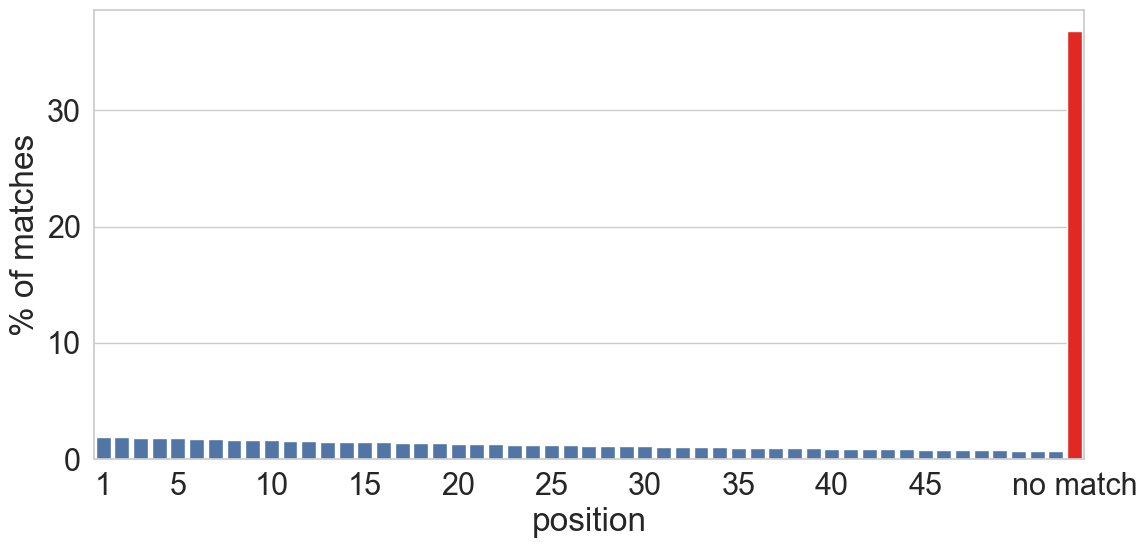

In [9]:
temp = normalize(results)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=temp.index, y=temp.values, palette = [*(["#4374B3"] * 52), "#FF0B04"])
plt.xticks([0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 52])
ax.set_xticklabels(["1","5","10","15","20","25","30","35","40","45","no match"])
ax.set_xlabel("position")
ax.set_ylabel("% of matches")
plt.tight_layout()
plt.savefig("images/fig-frequent-miracle-match-not-match.eps", dpi=300)
plt.show()

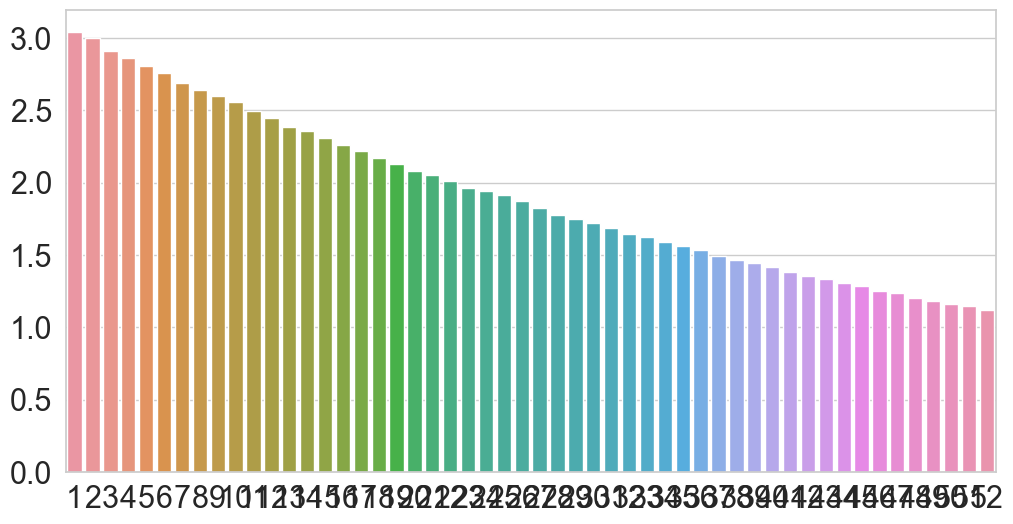

In [10]:
show_bar(normalize(matches))
plt.show()

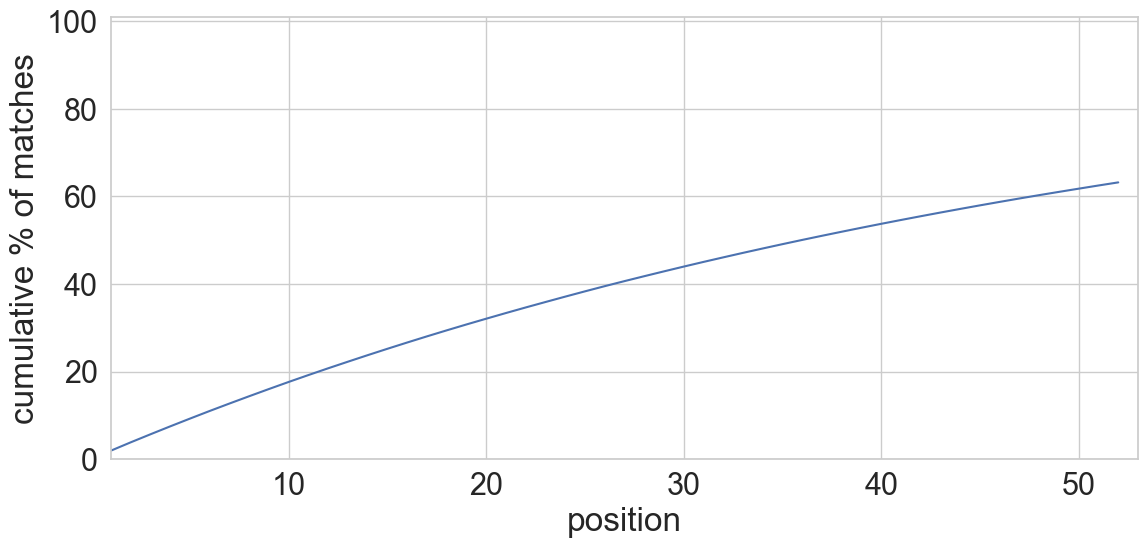

In [11]:
ax = show_line(normalize(results, cumulative=True)[:-1])
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")

plt.xlim(1, 53)
plt.ylim(0, 101)
plt.tight_layout()
plt.show()

In [12]:
m1 = matches
r1 = results

# A Frequent Miracle Deck

In [13]:
%%time

attempts, matches, no_match, avg_match, results = frequent_miracle(RUNS, accept_jokers=True)
m2 = matches
r2 = results
attempts, matches, no_match, avg_match, results

100%|█| 5000000/5000000 [00:14<00:00, 347486.30it/s


CPU times: user 14.8 s, sys: 132 ms, total: 14.9 s
Wall time: 14.6 s


(5000000,
 array([ 6,  6, 10, ...,  5, 14,  6]),
 1259,
 14.523701067928904,
 array([ 6,  6, 10, ...,  5, 14,  6]))

In [14]:
print("% of no matches: ", no_match / attempts * 100)
print("% of matches: ", (1 - no_match / attempts) * 100)
print(confidence(attempts - no_match, attempts))
print("Average match: ", avg_match)

% of no matches:  0.02518
% of matches:  99.97482
(0.9997339033940553, 0.9997617286734606)
Average match:  14.523701067928904


In [15]:
m1n = normalize(r1, cumulative=True)[:-1]
m2n = normalize(r2, cumulative=True)[:-1]


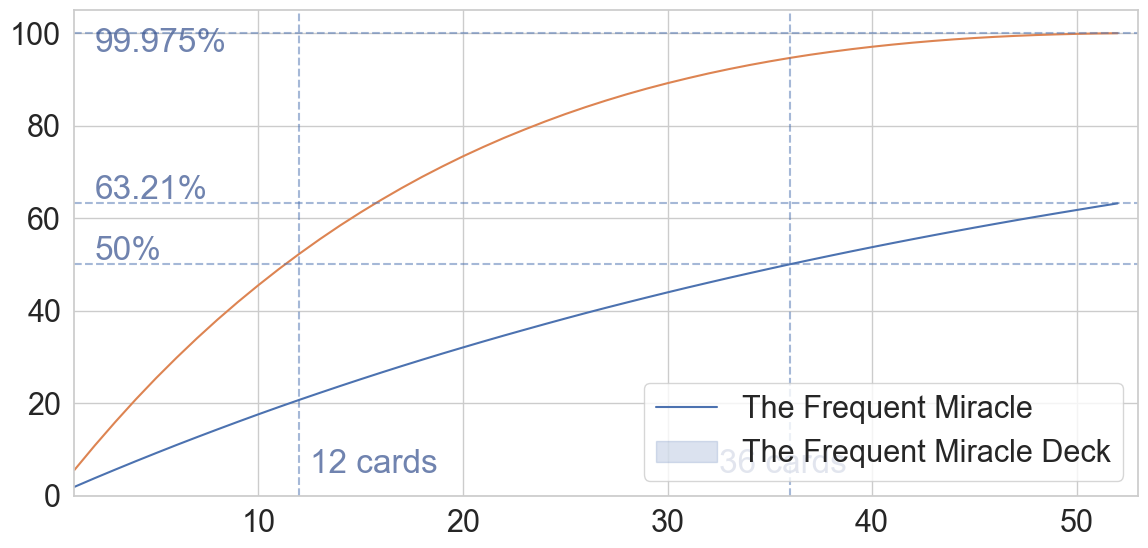

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x=m1n.index, y=m1n.values)
ax = sns.lineplot(x=m2n.index, y=m2n.values)
ax.axhline(y=50, linestyle='dashed', alpha=0.5)
ax.text(y=51, x=2, s='50%', alpha=0.7, color='#334f8d')

ax.axhline(y=63.2099, linestyle='dashed', alpha=0.5)
ax.text(y=64.2099, x=2, s='63.21%', alpha=0.7, color='#334f8d')

ax.axvline(x=12, linestyle='dashed', alpha=0.5)
ax.text(x=12.5, y=5, s='12 cards', alpha=0.7, color='#334f8d')



ax.axhline(y=99.975, linestyle='dashed', alpha=0.5)
ax.text(y=96, x=2, s='99.975%', alpha=0.7, color='#334f8d')

ax.axvline(x=36, linestyle='dashed', alpha=0.5)
ax.text(x=32.5, y=5, s='36 cards', alpha=0.7, color='#334f8d')

ax.legend(["The Frequent Miracle", "The Frequent Miracle Deck"])

plt.xlim(1, 53)
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


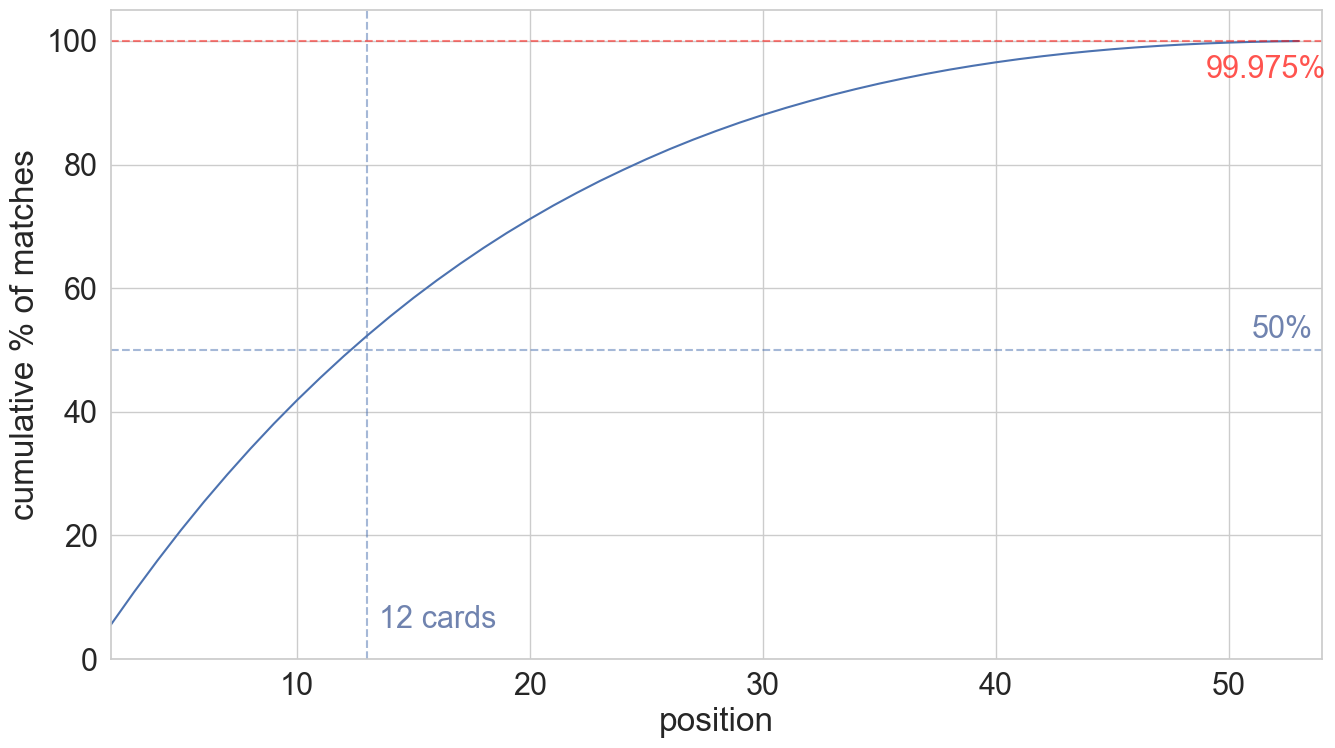

In [17]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(x=m2n.index, y=m2n.values)
ax.axhline(y=50, linestyle='dashed', alpha=0.5)
ax.text(y=52, x=50, s='50%', alpha=0.7, color='#334f8d', fontsize=22)

ax.axvline(x=12, linestyle='dashed', alpha=0.5)
ax.text(x=12.5, y=5, s='12 cards', alpha=0.7, color='#334f8d', fontsize=22)

ax.axhline(y=99.975, linestyle='dashed', alpha=0.5, color='#FF0B04')
ax.text(y=94, x=48, s='99.975%', alpha=0.7, color='#FF0B04', fontsize=22)

# ax.legend(["The Frequent Miracle Deck"])
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")

plt.xticks([0, 9, 19, 29, 39, 49])
ax.set_xticklabels(["1","10","20","30", "40", "50"])

plt.xlim(1, 53)
plt.ylim(0, 105)
plt.tight_layout()
plt.savefig("images/fig-cumulative-the-frequent-miracle-deck.eps", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


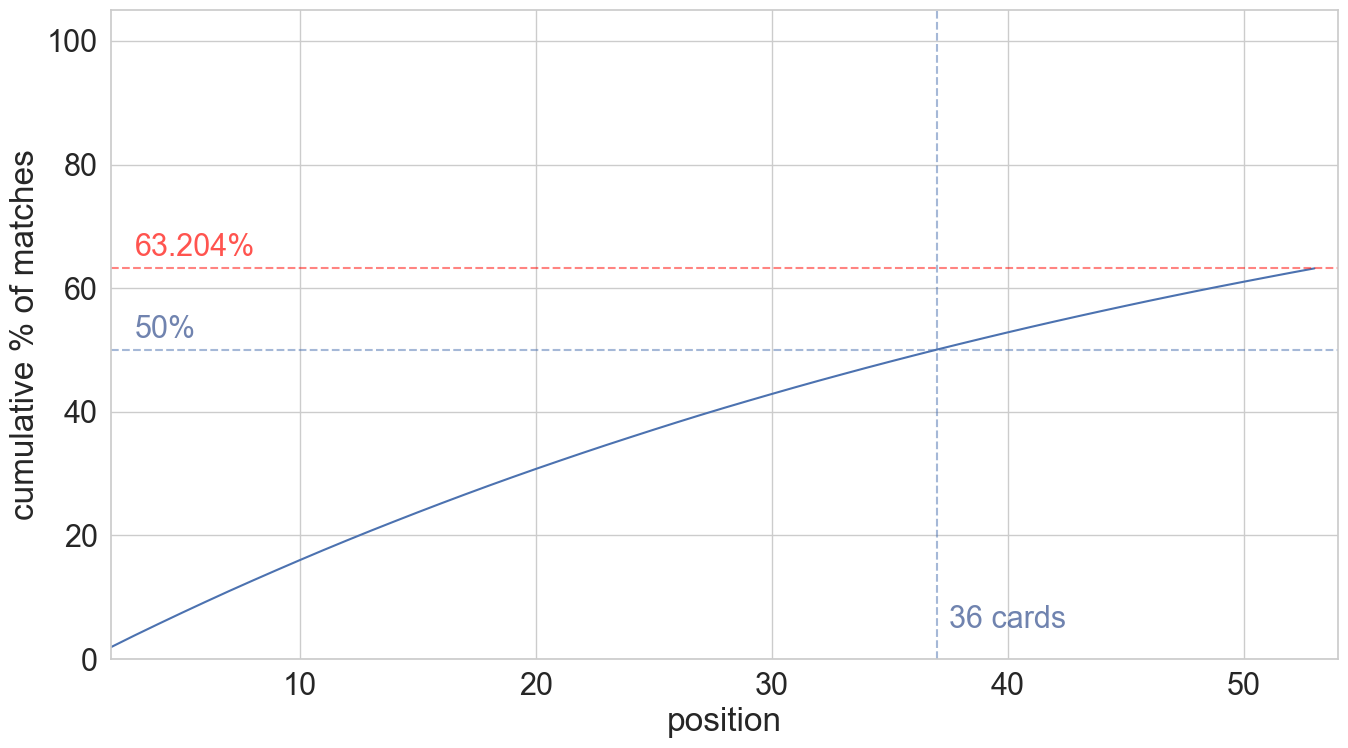

In [18]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(x=m1n.index, y=m1n.values)
ax.axhline(y=50, linestyle='dashed', alpha=0.5)
ax.text(y=52, x=2, s='50%', alpha=0.7, color='#334f8d', fontsize=22)

ax.axhline(y=63.204, linestyle='dashed', alpha=0.5, color='#FF0B04')
ax.text(y=65.204, x=2, s='63.204%', alpha=0.7, color='#FF0B04', fontsize=22)

ax.axvline(x=36, linestyle='dashed', alpha=0.5)
ax.text(x=36.5, y=5, s='36 cards', alpha=0.7, color='#334f8d', fontsize=22)

# ax.legend(["The Frequent Miracle"])
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")

plt.xticks([0, 9, 19, 29, 39, 49])
ax.set_xticklabels(["1","10","20","30", "40", "50"])

plt.xlim(1, 53)
plt.ylim(0, 105)
plt.tight_layout()
plt.savefig("images/fig-cumulative-the-frequent-miracle.eps", dpi=300)
plt.show()


# The Bingo Miracle: What are the odds of having a single card match with N decks?

In [19]:
%%time

p = partial(n_how_many_decks_match, RUNS)
results = run_multiple(p, range(1, 3))

df = pd.DataFrame(results, columns=["Deck count", "Probability"])
df.head()

1 parsed.
2 parsed.
CPU times: user 17.3 ms, sys: 23.6 ms, total: 41 ms
Wall time: 56.3 s


,Deck count,Probability
0,1,0.632209
1,2,0.864523


In [20]:
left = []
right = []
for i, (count, prob) in df.iterrows():
    r = binomial_ic(prob * RUNS, RUNS, 'wilson')
    left.append(r[0])
    right.append(r[1])
df["prob_l"] = left
df["prob_r"] = right
df

,Deck count,Probability,prob_l,prob_r
0,1,0.632209,0.631786,0.632632
1,2,0.864523,0.864222,0.864822


<Figure size 640x480 with 0 Axes>

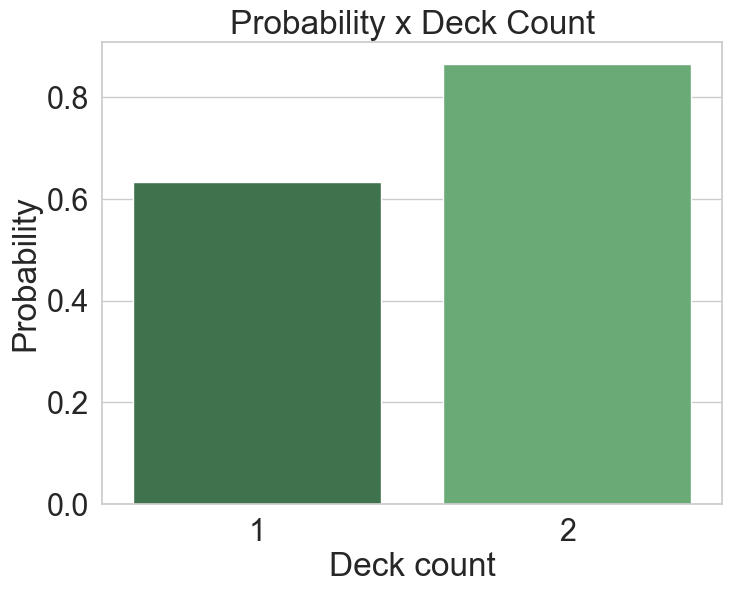

In [21]:
plt.tight_layout()
plot_all(df, "Probability")